In [1]:
from itertools import combinations
import pandas as pd
import numpy as np
import json

In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
%config InlineBackend.figure_format='retina'

#specify the style
# plt.style.use('ggplot')

plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['font.size'] = 15

# Set x axis
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 1

# # Set y axis
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['ytick.minor.width'] = 1


# # Fontsizes
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['legend.title_fontsize'] = 16
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16

# Set line widths
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['grid.linewidth'] = 1
plt.rcParams['lines.linewidth'] = 2

#set title size
plt.rcParams['figure.titlesize'] = 20

load the data

In [3]:
f = open('emimtf2n_FIM_info/PR_quadTdep.json')

data = json.load(f)

In [4]:
#record FIM of all samples
FIM_all_sample = []

for i in range(27):
    FIM_i = np.array(data[0][str(i)])
    FIM_all_sample.append(FIM_i)

#define the number of samples
n = 27

define the combination procedure

In [12]:
#demo for single combination, k

#define combination number k
# k = 2

def FIM_of_combination_k(k, return_exp=False):
    '''
        calculate the FIM of certain combination n,k
    Arguments:
        k: number of samples select out
    Returns:
        det(FIM)
    '''
    comb = combinations(range(0,n), k)

    #define list to record calculation of FIM
    det_FIM_single_k = []

    #calculate the FIM of the combination
    for i in list(comb):
        # print(i)
        # print(np.array(FIM_all_sample)[list(i)])
        # print(np.array(FIM_all_sample)[list(i)].shape)
        
        #adds up the FIM matrix
        FIM_single_k = np.array(FIM_all_sample)[list(i)].sum(axis=0)

        #calculate and record the det of FIM matrix
        det_FIM_single_k.append(np.linalg.det(FIM_single_k))
    # print(np.max(det_FIM_single_k))
    
    if return_exp:
        # print(np.argmax(det_FIM_single_k))
        return np.argmax(det_FIM_single_k), np.max(det_FIM_single_k)
    else:
        return np.max(det_FIM_single_k)

conduct number of experiment calculation and save

In [13]:
# det_FIM_all_k = []

# for k in range(0, n+1):
#     det_FIM_all_k.append(FIM_of_combination_k(k))

In [14]:
# np.savetxt("det_FIM_data.csv", det_FIM_all_k, delimiter=",")

load the number of experiment calculation file

In [15]:
det_FIM_all_k = np.loadtxt('det_FIM_data.csv')

det_FIM_all_k

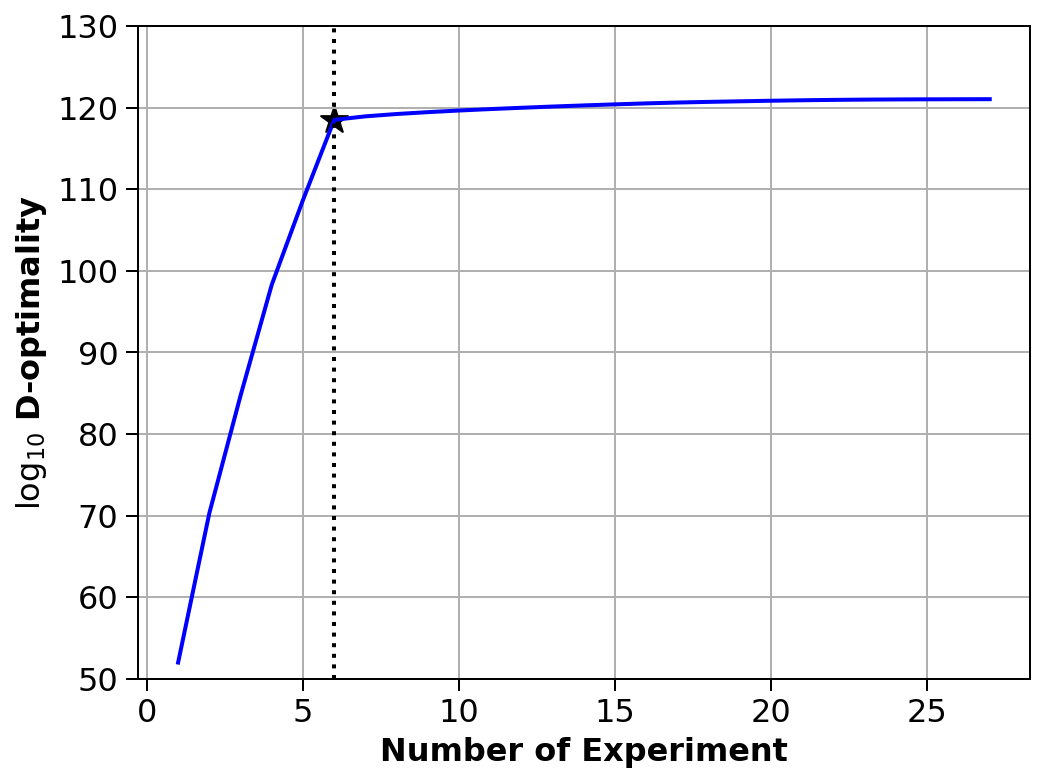

In [19]:
plt.plot(range(1, n+1), np.log10(det_FIM_all_k[1:]*1e10**6), c='b')
plt.scatter(6, np.log10(det_FIM_all_k[1:]*1e10**6)[5], s=200, c='k', marker='*')
plt.ylabel(r'$\mathrm{log}_{10}$ D-optimality')
plt.xlabel(r'Number of Experiment')
plt.vlines(6, 50, 130, color='k', linestyles='dotted')
plt.ylim(50, 130)
plt.grid()

determine the experiment

In [50]:
for i in range(4,9):
    index, _ = FIM_of_combination_k(i,return_exp=True)
    comb = combinations(range(0,n), i)

    #calculate the FIM of the combination
    print('proposed experiment for ' + str(i) + ' of experiment: ', list(comb)[index])

proposed experiment for 4 of experiment:  (5, 8, 12, 26)
proposed experiment for 5 of experiment:  (4, 5, 12, 16, 25)
proposed experiment for 6 of experiment:  (2, 5, 12, 19, 23, 26)
proposed experiment for 7 of experiment:  (2, 5, 12, 16, 19, 23, 26)
proposed experiment for 8 of experiment:  (2, 3, 5, 12, 16, 19, 23, 26)
